# Plot Carbon fluxes

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os

import dotenv
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import scmdata.database
import seaborn as sns
from matplotlib.gridspec import GridSpec

import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 8
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0

<IPython.core.display.Javascript object>

In [5]:
SCENARIO_TO_PLOT = "One Earth 2021|IMAGE_3_0_1|SSP1-Baseline-no-negative-CO2-AFOLU|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand"
SCENARIO_TO_PLOT = (
    "One Earth 2021|IMAGE_3_0_1|SSP1-Baseline-no-negative-CO2-AFOLU|0.5|UTS|S2"
)
SCENARIO_TO_PLOT = "One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2"
SCENARIO_TO_PLOT = (
    "One Earth 2021|Idealised from IMAGE 3.0.1|End deforestation 2030|0.5|UTS|S2"
)
PLOT_UNIT = "GtCO2 / yr"

<IPython.core.display.Javascript object>

In [6]:
OUT_FILE = os.path.join(
    utils.DATA_DIR, "processed", "summary", "overview-figure-data.csv"
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)

<IPython.core.display.Javascript object>

In [7]:
CO2_EMISSIONS_BREAKDOWN_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "crunched-scenarios",
    "co2-emissions-breakdown-{}.csv".format(utils.SCENARIO_CREATION_ID),
)
CO2_EMISSIONS_BREAKDOWN_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/crunched-scenarios/co2-emissions-breakdown-7d7c42.csv'

<IPython.core.display.Javascript object>

In [8]:
OUTPUT_DATABASE_DIR = os.path.join(
    utils.DATA_DIR,
    "interim",
    "magicc-output",
    utils.MAGICC_RUN_ID,
)
db = scmdata.database.ScmDatabase(OUTPUT_DATABASE_DIR, levels=("variable", "region"))
db

<scmdata.database.SCMDatabase (root_dir: /data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/interim/magicc-output/7d7c42, levels: ('variable', 'region'))>

<IPython.core.display.Javascript object>

In [9]:
db.available_data()["variable"].unique()

array(['Atmospheric-Concentrations-CO2', 'Effective-Radiative-Forcing',
       'Effective-Radiative-Forcing-Aerosols',
       'Effective-Radiative-Forcing-CO2', 'Emissions-BC',
       'Emissions-C2F6', 'Emissions-C3F8', 'Emissions-C4F10',
       'Emissions-C5F12', 'Emissions-C6F14', 'Emissions-C7F16',
       'Emissions-C8F18', 'Emissions-CCl4', 'Emissions-CF4',
       'Emissions-CFC11', 'Emissions-CFC113', 'Emissions-CFC114',
       'Emissions-CFC115', 'Emissions-CFC12', 'Emissions-CH2Cl2',
       'Emissions-CH3Br', 'Emissions-CH3CCl3', 'Emissions-CH3Cl',
       'Emissions-CH4', 'Emissions-CHCl3', 'Emissions-CO',
       'Emissions-CO2-MAGICC-AFOLU',
       'Emissions-CO2-MAGICC-Fossil-and-Industrial', 'Emissions-HCFC141b',
       'Emissions-HCFC142b', 'Emissions-HCFC22', 'Emissions-HFC125',
       'Emissions-HFC134a', 'Emissions-HFC143a', 'Emissions-HFC152a',
       'Emissions-HFC227ea', 'Emissions-HFC23', 'Emissions-HFC236fa',
       'Emissions-HFC245fa', 'Emissions-HFC32', 'Emissions

<IPython.core.display.Javascript object>

In [10]:
magicc_fluxes = scmdata.run_append(
    [db.load(variable=v, region="World") for v in ["*Flux*"]]
)
magicc_fluxes

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

<ScmRun (timeseries: 96000, timepoints: 401)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2150-01-01T00:00:00
Meta:
	      climate_model           model region  run_id  \
	0      MAGICCv7.5.3  One Earth 2021  World       0   
	1      MAGICCv7.5.3  One Earth 2021  World       0   
	2      MAGICCv7.5.3  One Earth 2021  World       0   
	3      MAGICCv7.5.3  One Earth 2021  World       0   
	4      MAGICCv7.5.3  One Earth 2021  World       0   
	...             ...             ...    ...     ...   
	95995  MAGICCv7.5.3  One Earth 2021  World     599   
	95996  MAGICCv7.5.3  One Earth 2021  World     599   
	95997  MAGICCv7.5.3  One Earth 2021  World     599   
	95998  MAGICCv7.5.3  One Earth 2021  World     599   
	95999  MAGICCv7.5.3  One Earth 2021  World     599   
	
	                                                scenario      unit  \
	0      One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...  GtC / yr   
	1      One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...  GtC / yr   
	2      One E

<IPython.core.display.Javascript object>

In [11]:
magicc_fluxes.get_unique_meta("scenario")

['One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|MESSAGEix-GLOBIOM_1_0|Lo

<IPython.core.display.Javascript object>

In [12]:
emissions = utils.mangle_scenario_name(scmdata.ScmRun(CO2_EMISSIONS_BREAKDOWN_FILE))
emissions

<ScmRun (timeseries: 320, timepoints: 89)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2103-01-01T00:00:00
Meta:
	              model region                                           scenario  \
	0    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	1    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	2    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	3    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	4    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	..              ...    ...                                                ...   
	315  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	316  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	317  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	318  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|

<IPython.core.display.Javascript object>

In [13]:
display(
    set(magicc_fluxes.get_unique_meta("scenario"))
    - set(emissions.get_unique_meta("scenario"))
)
emissions.get_unique_meta("scenario")

set()

['One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|UTS|S2-delayed',
 'One Earth 2021|IMAGE

<IPython.core.display.Javascript object>

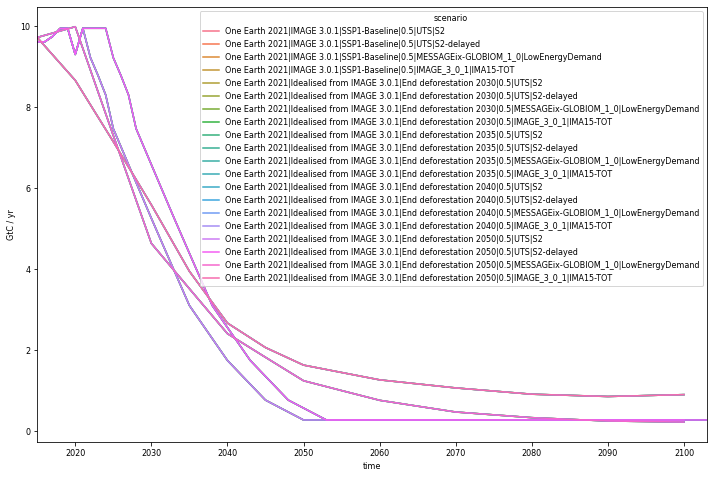

<IPython.core.display.Javascript object>

In [14]:
emissions.filter(scenario="*|0.5|*", variable="*Fossil*").lineplot()

In [15]:
historical_emms = scmdata.ScmRun(
    os.path.join(
        utils.DATA_DIR,
        "raw",
        "rcmip",
        "rcmip-emissions-annual-means-v5-1-0.csv",
    ),
    lowercase_cols=True,
).filter(
    region="World",
    scenario="historical",
    variable=emissions.get_unique_meta("variable"),
)
historical_emms

<ScmRun (timeseries: 2, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	         activity_id mip_era                model region    scenario  \
	2479  not_applicable   CMIP6  CEDS/UVA/GCP/PRIMAP  World  historical   
	2480  not_applicable   CMIP6  CEDS/UVA/GCP/PRIMAP  World  historical   
	
	           unit                                    variable  
	2479  Mt CO2/yr                  Emissions|CO2|MAGICC AFOLU  
	2480  Mt CO2/yr  Emissions|CO2|MAGICC Fossil and Industrial  

<IPython.core.display.Javascript object>

In [16]:
historical_emms["variable"] = historical_emms["variable"].map(
    {
        "Emissions|CO2|MAGICC Fossil and Industrial": "Emissions|CO2|MAGICC Fossil and Industrial",
        "Emissions|CO2|MAGICC AFOLU": "Emissions|CO2|AFOLU|No model reported sinks",
    }
)
hist_extra_uptake = (
    historical_emms.filter(variable="Emissions|CO2|AFOLU|No model reported sinks") * 0
)
hist_extra_uptake["variable"] = "Uptake|CO2"
historical_emms = historical_emms.append(hist_extra_uptake)
historical_emms

<ScmRun (timeseries: 3, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	      activity_id mip_era                model region    scenario       unit  \
	0  not_applicable   CMIP6  CEDS/UVA/GCP/PRIMAP  World  historical  Mt CO2/yr   
	1  not_applicable   CMIP6  CEDS/UVA/GCP/PRIMAP  World  historical  Mt CO2/yr   
	2  not_applicable   CMIP6  CEDS/UVA/GCP/PRIMAP  World  historical  Mt CO2/yr   
	
	                                      variable  
	0  Emissions|CO2|AFOLU|No model reported sinks  
	1   Emissions|CO2|MAGICC Fossil and Industrial  
	2                                   Uptake|CO2  

<IPython.core.display.Javascript object>

Join historical emissions onto scenario emissions.

In [17]:
scenario_emms = emissions.convert_unit(PLOT_UNIT).timeseries(
    drop_all_nan_times=True, time_axis="year"
)
historical_emms_to_join = (
    historical_emms.filter(year=range(scenario_emms.columns.min(), 3000), keep=False)
    .convert_unit(PLOT_UNIT)
    .timeseries(time_axis="year", meta=["variable", "region", "unit"])
)
display(historical_emms_to_join.head())

time                                                               1750  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.297465   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.009506   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1751  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.302937   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.009506   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                              1752  \
variable                                    region unit                  
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.30851   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.00951   
Uptake|CO2                                  World  GtCO2 / yr  0.00000   

time                                                               1753  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.314186   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.009510   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1754  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.319966   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.009514   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1755  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.325853   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.009518   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1756  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.331847   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.010169   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1757  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.337952   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.010173   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1758  \
variable                                    region unit                   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.344170   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.010177   
Uptake|CO2                                  World  GtCO2 / yr  0.000000   

time                                                               1759  ...  \
variable                                    region unit                  ...   
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr  0.350501  ...   
Emissions|CO2|MAGICC Fossil and Industrial  World  GtCO2 / yr  0.010181  ...   
Uptake|CO2                                  World  GtCO2 / yr  0.000000  ...   

time                                                                2005  \
variable                                    region unit                    
Emissions|CO2|AFOLU|No model reported sinks World  GtCO2 / yr   3.75

<IPython.core.display.Javascript object>

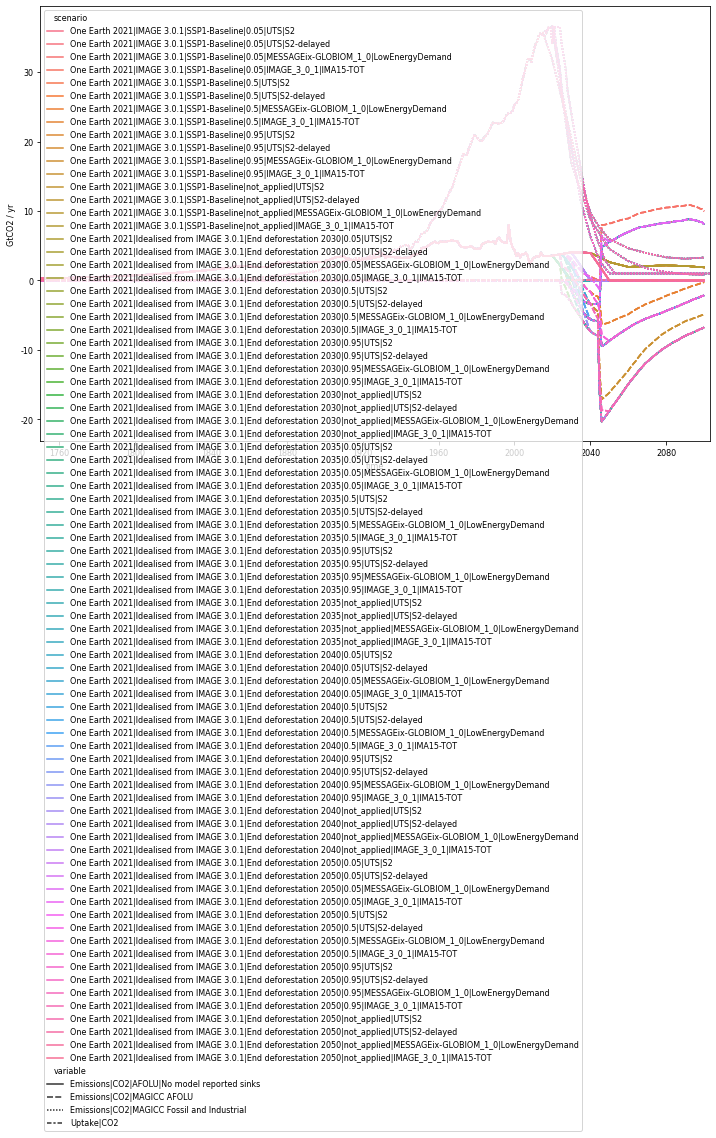

<IPython.core.display.Javascript object>

In [18]:
ha, sa = historical_emms_to_join.align(scenario_emms)
ha = ha.dropna(how="all", axis="columns")
sa = sa.dropna(how="all", axis="columns")
plot_emissions = scmdata.ScmRun(pd.concat([ha, sa], axis=1))
plot_emissions.lineplot(style="variable")

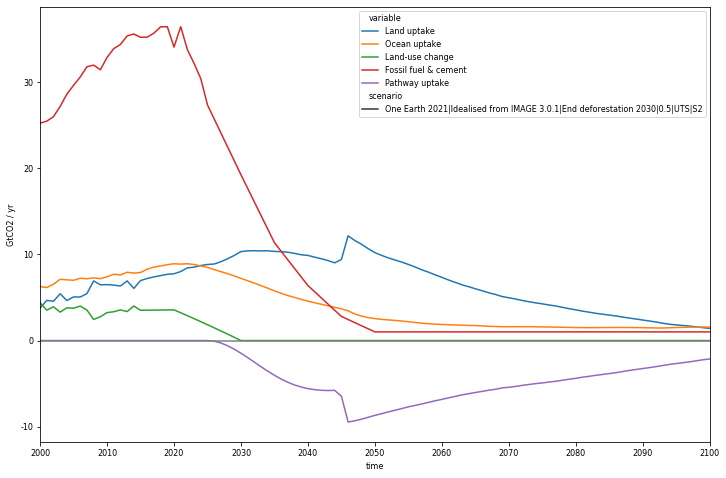

<IPython.core.display.Javascript object>

In [19]:
plot_years = range(2000, 2100 + 1)

land_uptake_name = "Land uptake"
land_sink_name = "Land sinks"
ocean_uptake_name = "Ocean uptake"
ocean_sink_name = "Ocean sinks"
ind_name = "Fossil fuel & cement"
afolu_name = "Land-use change"
uptake_name = "Pathway uptake"
variable_name_map = {
    "Net Atmosphere to Land Flux|CO2": land_uptake_name,
    "Net Atmosphere to Ocean Flux|CO2": ocean_uptake_name,
    "Emissions|CO2|MAGICC Fossil and Industrial": ind_name,
    "Emissions|CO2|AFOLU|No model reported sinks": afolu_name,
    "Uptake|CO2": uptake_name,
}
pdf = (
    scmdata.run_append(
        [scmdata.ScmRun(magicc_fluxes.process_over("run_id", "median")), plot_emissions]
    )
    .filter(scenario=SCENARIO_TO_PLOT, year=plot_years)
    .convert_unit(PLOT_UNIT)
)
pdf = pdf.interpolate(pdf["time"])
pdf["variable"] = pdf["variable"].map(variable_name_map)
ax = pdf.lineplot(hue="variable", style="scenario")
ax.axhline(0, color="gray")

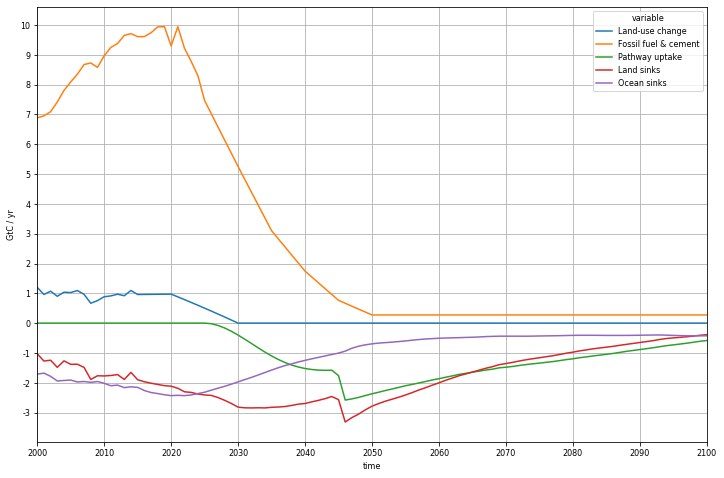

<IPython.core.display.Javascript object>

In [20]:
pdf_sinks = scmdata.run_append(
    [
        pdf.filter(variable=[ind_name, afolu_name, uptake_name]),
        -1 * pdf.filter(variable=[land_uptake_name, ocean_uptake_name]),
    ]
)
pdf_sinks["variable"] = pdf_sinks["variable"].map(
    {
        ind_name: ind_name,
        afolu_name: afolu_name,
        uptake_name: uptake_name,
        land_uptake_name: land_sink_name,
        ocean_uptake_name: ocean_sink_name,
    }
)
ax = pdf_sinks.convert_unit("GtC / yr").lineplot(hue="variable")
ax.set_yticks(range(-3, 10 + 1))
ax.grid()

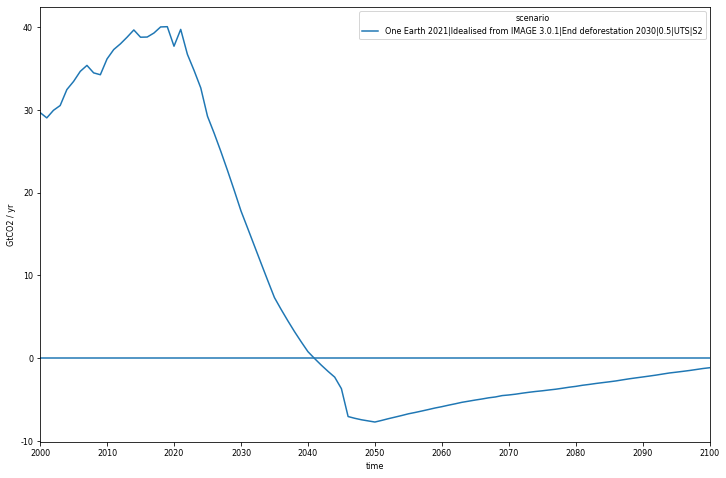

<IPython.core.display.Javascript object>

In [21]:
total_co2 = (
    pdf_sinks.filter(variable=ind_name)
    .add(pdf_sinks.filter(variable=afolu_name), op_cols={"variable": "Emissions|CO2"})
    .add(pdf_sinks.filter(variable=uptake_name), op_cols={"variable": "Emissions|CO2"})
    .convert_unit(PLOT_UNIT)
)
ax = total_co2.lineplot()
ax.axhline(0)

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


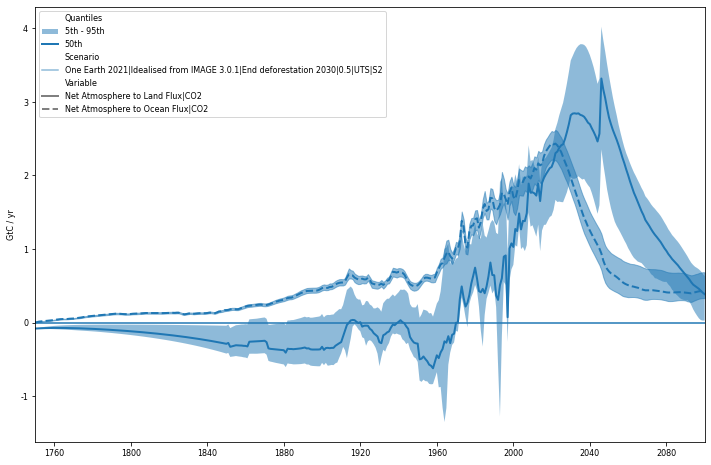

<IPython.core.display.Javascript object>

In [22]:
ax, _ = magicc_fluxes.filter(
    scenario=SCENARIO_TO_PLOT,
    year=range(1750, 2100 + 1),
).plumeplot(quantile_over=("quantile", "run_id"))
ax.axhline(0)

In [23]:
pyam.run_control().update(
    {
        "color": {
            "variable": {
                ind_name: "#202020",
                afolu_name: "tab:orange",
                uptake_name: "tab:pink",
                land_sink_name: "tab:green",
                ocean_sink_name: "tab:blue",
            }
        }
    }
)

<IPython.core.display.Javascript object>

In [24]:
def find_threshold_year(inp, threshold=0):
    ts = inp.timeseries(time_axis="year")
    assert ts.shape[0] == 1
    threshold_year = ts.loc[:, (ts <= threshold).any()].columns[0]

    return threshold_year

<IPython.core.display.Javascript object>

(-350.0, 630.0)

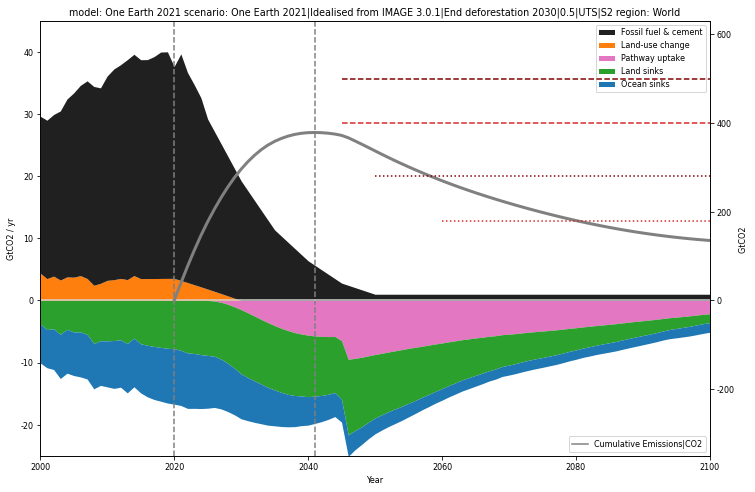

<IPython.core.display.Javascript object>

In [25]:
pdf_pyam = pyam.IamDataFrame(
    pdf_sinks.convert_unit(PLOT_UNIT)
    .drop_meta("climate_model")
    .timeseries(time_axis="year")
)
ax = pdf_pyam.plot.stack(
    order=[
        ind_name,
        afolu_name,
        uptake_name,
        land_sink_name,
        ocean_sink_name,
    ],
    #     total=True,
)
ax.legend(loc="upper right")

cumulative_emms_rel_year = 2020
ax2 = ax.twinx()
total_co2_cumulative = (
    total_co2.filter(year=range(cumulative_emms_rel_year, 2100 + 1))
    .integrate()
    .convert_unit(PLOT_UNIT.replace("/ yr", ""))
)
total_co2_cumulative.lineplot(
    ax=ax2, time_axis="year", linewidth=3, palette="gray", hue="variable"
)
ax2.legend(loc="lower right")
# # to illustrate the difference between just adding up all emms and integrating
# total_co2.filter(year=range(2020, 2100 + 1)).timeseries(time_axis="year").shift(
#     axis=1
# ).cumsum(axis=1).T.plot(ax=ax2)

ar6_15_budget_67 = 400
ar6_15_budget_50 = 500
ar6_budget_nonco2_uncertainty = 220
ax2.axhline(ar6_15_budget_50, color="maroon", linestyle="--", xmin=0.45)
ax2.axhline(
    ar6_15_budget_50 - ar6_budget_nonco2_uncertainty,
    color="maroon",
    linestyle=":",
    xmin=0.5,
)
ax2.axhline(ar6_15_budget_67, color="tab:red", linestyle="--", xmin=0.45)
ax2.axhline(
    ar6_15_budget_67 - ar6_budget_nonco2_uncertainty,
    color="tab:red",
    linestyle=":",
    xmin=0.6,
)

linestyle_time_markers = "--"
color_time_markers = "gray"
ax.axvline(
    cumulative_emms_rel_year, linestyle=linestyle_time_markers, color=color_time_markers
)
ax.axvline(
    find_threshold_year(total_co2),
    linestyle=linestyle_time_markers,
    color=color_time_markers,
)


ylim = np.array([-25, 45])
ax.set_ylim(ylim)
ax.axhline(0, color="lightgray")
ax2.set_ylim(ylim * 14)

In [26]:
# pdf_pyam.to_csv(OUT_FILE)

<IPython.core.display.Javascript object>

In [27]:
display(total_co2_cumulative.timeseries().values.max())
total_co2_cumulative.timeseries().values.squeeze()[-1]

378.59354616118185

135.2218814059338

<IPython.core.display.Javascript object>

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

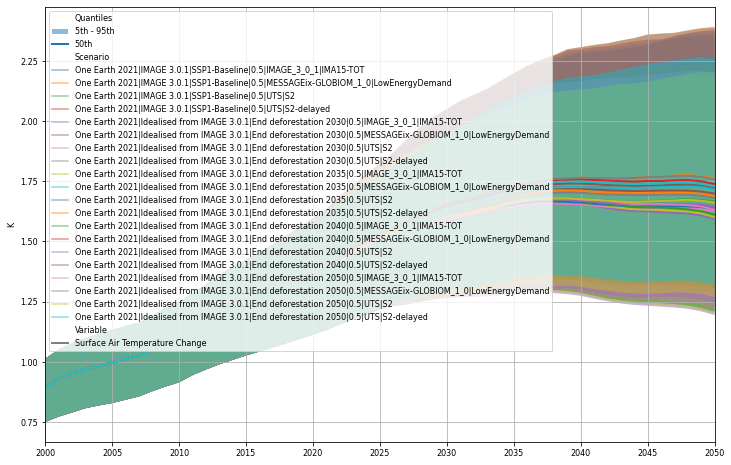

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

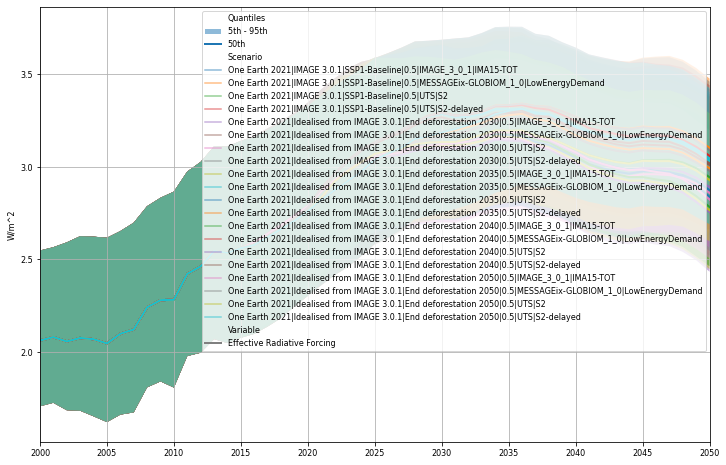

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

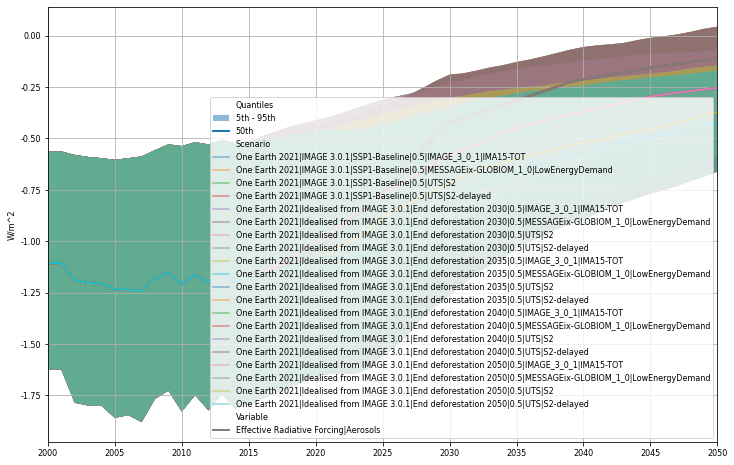

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

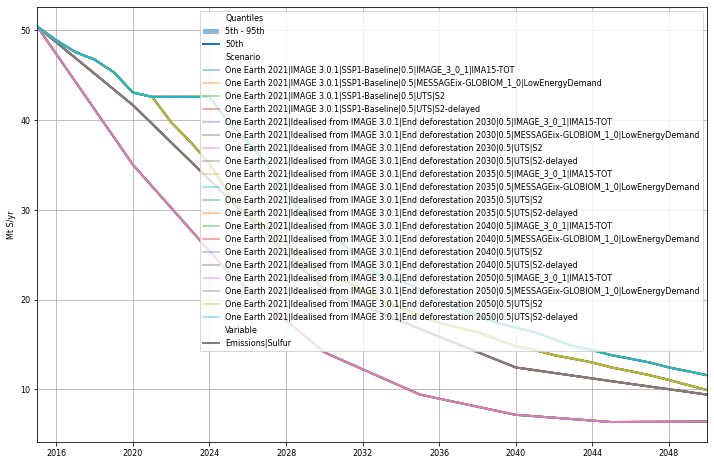

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

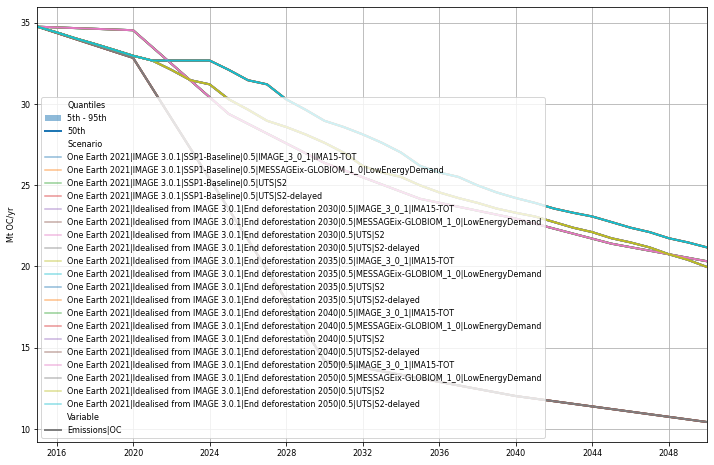

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

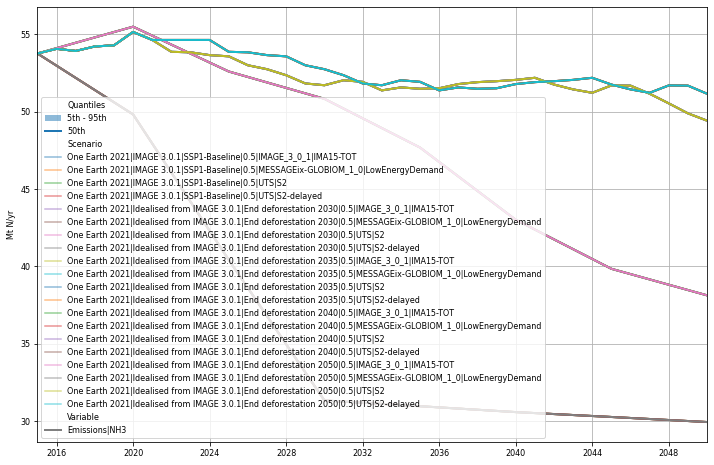

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

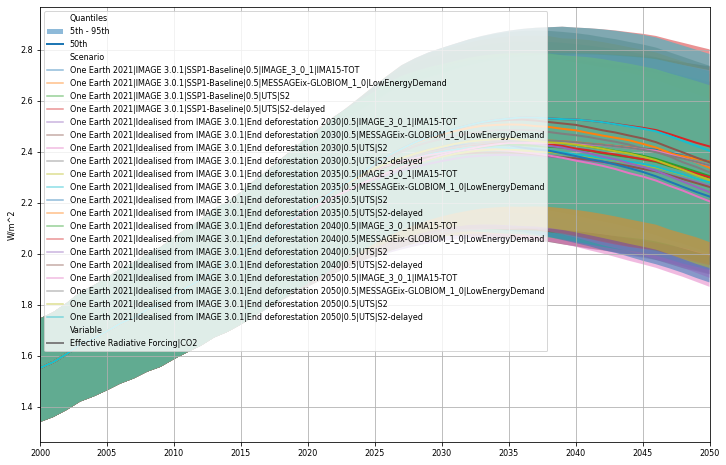

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

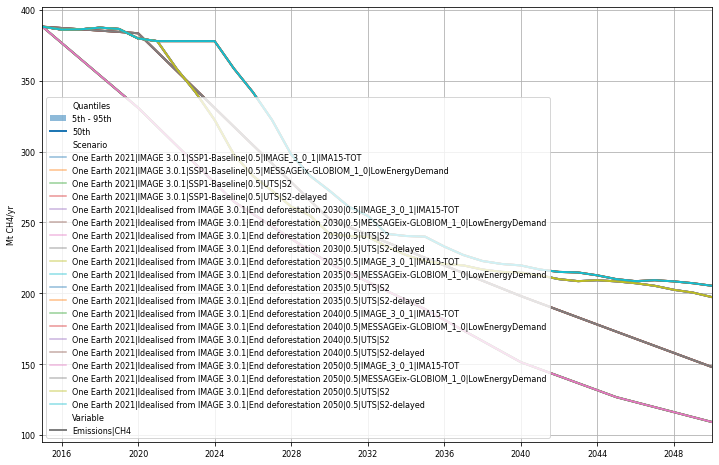

<IPython.core.display.Javascript object>

In [28]:
for v in [
    "Surface Air Temperature Change",
    "Effective Radiative Forcing",
    "Effective Radiative Forcing|Aerosols",
    "Emissions|Sulfur",
    "Emissions|OC",
    "Emissions|NH3",
    "Effective Radiative Forcing|CO2",
    "Emissions|CH4",
]:
    pdf = db.load(variable=v, region="World")
    ax, _ = pdf.filter(scenario="*|0.5|*", year=range(2000, 2050 + 1)).plumeplot(
        quantile_over=("run_id", "quantile")
    )
    ax.grid()
    plt.show()

In [29]:
pdf_sinks

<ScmRun (timeseries: 5, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	  climate_model           model region  \
	0           NaN  One Earth 2021  World   
	1           NaN  One Earth 2021  World   
	2           NaN  One Earth 2021  World   
	3  MAGICCv7.5.3  One Earth 2021  World   
	4  MAGICCv7.5.3  One Earth 2021  World   
	
	                                            scenario        unit  \
	0  One Earth 2021|Idealised from IMAGE 3.0.1|End ...  GtCO2 / yr   
	1  One Earth 2021|Idealised from IMAGE 3.0.1|End ...  GtCO2 / yr   
	2  One Earth 2021|Idealised from IMAGE 3.0.1|End ...  GtCO2 / yr   
	3  One Earth 2021|Idealised from IMAGE 3.0.1|End ...  GtCO2 / yr   
	4  One Earth 2021|Idealised from IMAGE 3.0.1|End ...  GtCO2 / yr   
	
	               variable  
	0       Land-use change  
	1  Fossil fuel & cement  
	2        Pathway uptake  
	3            Land sinks  
	4           Ocean sinks  

<IPython.core.display.Javascript object>

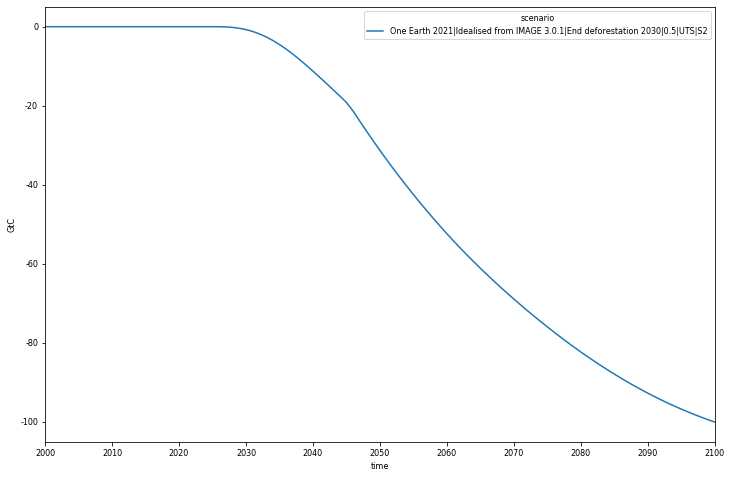

<IPython.core.display.Javascript object>

In [30]:
luc_emms = pdf_sinks.filter(variable=uptake_name)
luc_emms.integrate().convert_unit("GtC").lineplot()